In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

In [2]:
ML_RES_FILE = "./Results/ML/repr_dict_magdy.joblib"

In [3]:
ml_files = load(ML_RES_FILE)

In [4]:
ml_files.keys()

dict_keys(['RF-FS-LEFT', 'RF-FS-RIGHT', 'SVM-FS-LEFT', 'SVM-FS-RIGHT'])

In [8]:
ml_files['RF-FS-LEFT']['lSVM'].best_score_

0.5666666666666667

In [9]:
ml_files['RF-FS-LEFT']['lg'].best_estimator_

0.5833333333333333

In [14]:
best_score = 0
best = {}
for model in ml_files:
    clc_dict = ml_files[model]
    for clc in clc_dict:

        score = clc_dict[clc].best_score_
        if score>best_score:
            best['model']=model
            best['score'] = score
            best['clc'] = clc_dict[clc].best_estimator_
            best['index'] = clc_dict[clc].best_index_

print(best)
            

{'model': 'SVM-FS-RIGHT', 'score': 0.7583333333333332, 'clc': MLPClassifier(activation='tanh', alpha=0.001, beta_1=0, beta_2=0.5,
              learning_rate='adaptive', max_iter=1000000), 'index': 94}


In [1]:
# Magdy's file had a problem
# Starting with my files now


In [36]:
# Baselines
"""
site SDSU contains 36 subjects.
Number of ASD in SDSU: 14
Number of TD in SDSU: 22
Baseline performance = 61.111111111111114%

site CMU contains 27 subjects.
Number of ASD in CMU: 14
Number of TD in CMU: 13
Baseline performance = 51.85185185185185%


site KKI contains 34 subjects.
Number of ASD in KKI: 8
Number of TD in KKI: 26
Baseline performance = 76.47058823529412%
Ignoring KKI with baseline 76.47058823529412%.


site Leuven contains 63 subjects.
Number of ASD in Leuven: 29
Number of TD in Leuven: 34
Baseline performance = 53.96825396825397%


site NYU contains 138 subjects.
Number of ASD in NYU: 38
Number of TD in NYU: 100
Baseline performance = 72.46376811594203%
Ignoring NYU with baseline 72.46376811594203%.


site Pitt contains 56 subjects.
Number of ASD in Pitt: 29
Number of TD in Pitt: 27
Baseline performance = 51.78571428571429%

site MaxMun contains 51 subjects.
Number of ASD in MaxMun: 23
Number of TD in MaxMun: 28
Baseline performance = 54.90196078431373%

site Stanford contains 38 subjects.
Number of ASD in Stanford: 19
Number of TD in Stanford: 19
Baseline performance = 50.0%

site Caltech contains 37 subjects.
Number of ASD in Caltech: 19
Number of TD in Caltech: 18
Baseline performance = 51.35135135135135%

site UCLA contains 95 subjects.
Number of ASD in UCLA: 53
Number of TD in UCLA: 42
Baseline performance = 55.78947368421052%


site Yale contains 56 subjects.
Number of ASD in Yale: 28
Number of TD in Yale: 28
Baseline performance = 50.0%

site USM contains 71 subjects.
Number of ASD in USM: 46
Number of TD in USM: 25
Baseline performance = 64.7887323943662%

site UM contains 134 subjects.
Number of ASD in UM: 61
Number of TD in UM: 73
Baseline performance = 54.47761194029851%

site Trinity contains 47 subjects.
Number of ASD in Trinity: 22
Number of TD in Trinity: 25
Baseline performance = 53.191489361702125%

site SBL contains 15 subjects.
Number of ASD in SBL: 0
Number of TD in SBL: 15
Baseline performance = 100.0%

site Olin contains 34 subjects.
Number of ASD in Olin: 19
Number of TD in Olin: 15
Baseline performance = 55.88235294117647%

site OHSU contains 26 subjects.
Number of ASD in OHSU: 12
Number of TD in OHSU: 14
Baseline performance = 53.84615384615385%

"""
NUM_SAMPLES = {
    'SDSU': 36,
    'KKI': 34, # Ignored
    'Leuven': 63,
    'CMU': 27,
    'NYU': 138, # Ignored
    'Pitt': 56,
    'MaxMun': 51,
    'Caltech': 37,
    'Stanford': 38,
    'UCLA': 95,
    'Yale': 56,
    'USM' : 71,
    'UM': 134,
    'Trinity': 47,
    'SBL': 15, # Ignored
    'Olin': 34,
    'OHSU': 26
}
BASELINES = {
    'SDSU': 0.6111111,
    'KKI': 0.7647, # Ignored
    'Leuven': 0.539682,
    'CMU': 0.51851,
    'NYU': 0.7246, # Ignored
    'Pitt': 0.5178,
    'MaxMun': 0.549019,
    'Caltech': 0.5135,
    'Stanford': 0.5,
    'UCLA': 0.55789,
    'Yale': 0.5,
    'USM' : 0.6478,
    'UM': 0.54477,
    'Trinity': 0.531914,
    'SBL': 1, # Ignored
    'Olin': 0.5588,
    'OHSU': 0.53846
}

In [148]:
file_dir = './Results/sites_results.joblib'
file_s_dir = './Results/sites_results_leftover.joblib'
file_corr_dir = "./Results/sites_results_correlation.joblib"
file_all_dir = './Results/sites_results_all.joblib'
file = load(file_dir)
file_rest = load(file_s_dir)
file_corr = load(file_corr_dir)
file_all = load(file_all_dir)

In [149]:
file.keys(), file_rest.keys(), file_corr.keys(), file_all.keys()

(dict_keys(['SDSU', 'CMU', 'Leuven', 'Pitt', 'MaxMun', 'OHSU', 'Olin', 'Trinity', 'UM']),
 dict_keys(['USM', 'Yale', 'UCLA', 'Stanford', 'Caltech']),
 dict_keys(['SDSU', 'CMU', 'Leuven', 'Pitt', 'MaxMun', 'OHSU', 'Olin', 'Trinity', 'UM', 'USM', 'Yale', 'UCLA', 'Stanford', 'Caltech']),
 dict_keys(['SDSU', 'CMU', 'Leuven', 'Pitt', 'MaxMun', 'OHSU', 'Olin', 'Trinity', 'UM', 'USM', 'Yale', 'UCLA', 'Stanford', 'Caltech']))

In [ ]:
from collections import defaultdict
sites_result_dict = defaultdict(dict)

In [90]:
sites_result_corr_dict = defaultdict(dict)

In [150]:
sites_result_all_dict = defaultdict(dict)

In [92]:
# For corr feats
for site in file_corr:
    site_dict = file_corr[site]
    for model in site_dict:
        clc_dict = site_dict[model]
        sites_result_corr_dict[site][model] = dict.fromkeys(clc_dict.keys())
        for clc in clc_dict:
            clf_obj = clc_dict[clc]
            sites_result_corr_dict[site][model][clc] = clf_obj.best_score_

In [151]:
# For all feats
for site in file_all:
    site_dict = file_all[site]
    for model in site_dict:
        clc_dict = site_dict[model]
        sites_result_all_dict[site][model] = dict.fromkeys(clc_dict.keys())
        for clc in clc_dict:
            clf_obj = clc_dict[clc]
            sites_result_all_dict[site][model][clc] = clf_obj.best_score_

In [10]:
len(sites_result_dict)

14

In [133]:
sites_result_all_dict.keys()

dict_keys(['SDSU', 'CMU', 'Leuven', 'Pitt', 'MaxMun', 'OHSU', 'Olin', 'Trinity', 'UM'])

In [11]:
df = pd.DataFrame(sites_result_dict)

In [12]:
df.head()

,SDSU,CMU,Leuven,Pitt,MaxMun,OHSU,Olin,Trinity,UM,USM,Yale,UCLA,Stanford,Caltech
RF-FS-LEFT,"{'lSVM': 0.6549999999999999, 'pagg': 0.6549999...","{'lSVM': 0.4333333333333333, 'pagg': 0.6666666...","{'lSVM': 0.5304761904761905, 'pagg': 0.6395238...","{'lSVM': 0.5866666666666667, 'pagg': 0.5866666...","{'lSVM': 0.54, 'pagg': 0.5433333333333333, 'lg...","{'lSVM': 0.75, 'pagg': 0.75, 'lg': 0.766666666...","{'lSVM': 0.6166666666666667, 'pagg': 0.6833333...","{'lSVM': 0.625, 'pagg': 0.6699999999999999, 'l...","{'lSVM': 0.6466300366300366, 'pagg': 0.6401831...","{'lSVM': 0.5755555555555556, 'pagg': 0.6377777...","{'lSVM': 0.45999999999999996, 'pagg': 0.559999...","{'lSVM': 0.5620707070707069, 'pagg': 0.5977777...","{'lSVM': 0.6583333333333333, 'pagg': 0.6499999...","{'lSVM': 0.5666666666666667, 'pagg': 0.575, 'l..."
RF-FS-RIGHT,"{'lSVM': 0.585, 'pagg': 0.6683333333333333, 'l...","{'lSVM': 0.4833333333333333, 'pagg': 0.5333333...","{'lSVM': 0.5676190476190476, 'pagg': 0.5290476...","{'lSVM': 0.5533333333333333, 'pagg': 0.5466666...","{'lSVM': 0.6566666666666666, 'pagg': 0.6566666...","{'lSVM': 0.7333333333333332, 'pagg': 0.6499999...","{'lSVM': 0.5833333333333333, 'pagg': 0.6416666...","{'lSVM': 0.6799999999999999, 'pagg': 0.6599999...","{'lSVM': 0.6792307692307692, 'pagg': 0.6763553...","{'lSVM': 0.5366666666666667, 'pagg': 0.6211111...","{'lSVM': 0.5566666666666666, 'pagg': 0.6033333...","{'lSVM': 0.4717929292929293, 'pagg': 0.6007070...","{'lSVM': 0.5416666666666666, 'pagg': 0.6083333...","{'lSVM': 0.5333333333333333, 'pagg': 0.6416666..."
SVM-FS-LEFT,"{'lSVM': 0.5849999999999999, 'pagg': 0.6549999...","{'lSVM': 0.3333333333333333, 'pagg': 0.5, 'lg'...","{'lSVM': 0.5447619047619048, 'pagg': 0.5828571...","{'lSVM': 0.6133333333333334, 'pagg': 0.6266666...","{'lSVM': 0.5866666666666667, 'pagg': 0.6050000...","{'lSVM': 0.5833333333333333, 'pagg': 0.5666666...","{'lSVM': 0.6166666666666666, 'pagg': 0.5833333...","{'lSVM': 0.675, 'pagg': 0.675, 'lg': 0.675, 'X...","{'lSVM': 0.5574358974358974, 'pagg': 0.5943040...","{'lSVM': 0.5555555555555556, 'pagg': 0.5866666...","{'lSVM': 0.5233333333333333, 'pagg': 0.5966666...","{'lSVM': 0.5759090909090909, 'pagg': 0.5734595...","{'lSVM': 0.5833333333333333, 'pagg': 0.6083333...","{'lSVM': 0.6083333333333333, 'pagg': 0.5916666..."
SVM-FS-RIGHT,"{'lSVM': 0.45999999999999996, 'pagg': 0.625, '...","{'lSVM': 0.4666666666666666, 'pagg': 0.6166666...","{'lSVM': 0.46142857142857147, 'pagg': 0.583333...","{'lSVM': 0.5333333333333334, 'pagg': 0.6033333...","{'lSVM': 0.6066666666666667, 'pagg': 0.6816666...","{'lSVM': 0.5666666666666667, 'pagg': 0.5999999...","{'lSVM': 0.6583333333333333, 'pagg': 0.675, 'l...","{'lSVM': 0.66, 'pagg': 0.6599999999999999, 'lg...","{'lSVM': 0.6676556776556776, 'pagg': 0.6424725...","{'lSVM': 0.5, 'pagg': 0.55, 'lg': 0.5077777777...","{'lSVM': 0.5433333333333333, 'pagg': 0.6199999...","{'lSVM': 0.5210858585858587, 'pagg': 0.5736616...","{'lSVM': 0.425, 'pagg': 0.5666666666666667, 'l...","{'lSVM': 0.625, 'pagg': 0.65, 'lg': 0.59166666..."


In [9]:
d = {'l':5, 'c':2}
n

0

In [13]:
def max_key_dict(dic):
    max_val = -np.inf
    max_key = None
    for key in dic:
        if dic[key]>max_val:
            max_val = dic[key]
            max_key = key
            
    return max_key, dic[max_key]

In [18]:
max_site_result_dict = defaultdict(dict)
for site in sites_result_dict:
    model_dict = sites_result_dict[site]
    for model in model_dict:
        clc_dict = model_dict[model]
        max_clc, max_acc = max_key_dict(clc_dict)
        max_site_result_dict[site][model] = (max_clc, max_acc, BASELINES[site])


In [93]:
#For corr feats
max_site_result_corr_dict = defaultdict(dict)
for site in sites_result_dict:
    model_dict = sites_result_corr_dict[site]
    for model in model_dict:
        clc_dict = model_dict[model]
        max_clc, max_acc = max_key_dict(clc_dict)
        max_site_result_corr_dict[site][model] = (max_clc, max_acc, BASELINES[site])

In [152]:
# For all feats
max_site_result_all_dict = defaultdict(dict)
for site in sites_result_all_dict:
    model_dict = sites_result_all_dict[site]
    for model in model_dict:
        clc_dict = model_dict[model]
        max_clc, max_acc = max_key_dict(clc_dict)
        max_site_result_all_dict[site][model] = (max_clc, max_acc, BASELINES[site])


In [138]:
max_site_result_all_dict['SDSU'].keys()

dict_keys(['all_feats_left', 'all_feats_right'])

In [19]:
df = pd.DataFrame(max_site_result_dict)

In [20]:
df

,SDSU,CMU,Leuven,Pitt,MaxMun,OHSU,Olin,Trinity,UM,USM,Yale,UCLA,Stanford,Caltech
RF-FS-LEFT,"(XGB, 0.7633333333333333, 0.6111111)","(XGB, 0.7666666666666666, 0.51851)","(pagg, 0.6395238095238095, 0.539682)","(Rf, 0.7033333333333334, 0.5178)","(XGB, 0.7033333333333334, 0.549019)","(nn, 0.85, 0.53846)","(XGB, 0.8416666666666666, 0.5588)","(pagg, 0.6699999999999999, 0.531914)","(XGB, 0.6756776556776557, 0.54477)","(pagg, 0.6377777777777778, 0.6478)","(Rf, 0.6433333333333333, 0.5)","(SVC, 0.6086868686868687, 0.55789)","(nn, 0.7499999999999999, 0.5)","(Rf, 0.6916666666666667, 0.5135)"
RF-FS-RIGHT,"(XGB, 0.7516666666666666, 0.6111111)","(XGB, 0.7, 0.51851)","(XGB, 0.6519047619047618, 0.539682)","(XGB, 0.6933333333333332, 0.5178)","(nn, 0.7316666666666667, 0.549019)","(lSVM, 0.7333333333333332, 0.53846)","(XGB, 0.7416666666666666, 0.5588)","(XGB, 0.715, 0.531914)","(nn, 0.7158058608058608, 0.54477)","(XGB, 0.6855555555555555, 0.6478)","(SVC, 0.6633333333333333, 0.5)","(nn, 0.7035858585858585, 0.55789)","(nn, 0.7, 0.5)","(XGB, 0.7916666666666666, 0.5135)"
SVM-FS-LEFT,"(nn, 0.735, 0.6111111)","(Rf, 0.8333333333333333, 0.51851)","(XGB, 0.6266666666666667, 0.539682)","(pagg, 0.6266666666666667, 0.5178)","(nn, 0.6833333333333333, 0.549019)","(XGB, 0.7333333333333332, 0.53846)","(nn, 0.7249999999999999, 0.5588)","(SVC, 0.735, 0.531914)","(XGB, 0.6415567765567766, 0.54477)","(XGB, 0.6766666666666667, 0.6478)","(nn, 0.6100000000000001, 0.5)","(XGB, 0.669141414141414, 0.55789)","(nn, 0.75, 0.5)","(SVC, 0.7083333333333333, 0.5135)"
SVM-FS-RIGHT,"(XGB, 0.7483333333333333, 0.6111111)","(SVC, 0.8166666666666667, 0.51851)","(pagg, 0.5833333333333334, 0.539682)","(SVC, 0.6333333333333334, 0.5178)","(SVC, 0.7350000000000001, 0.549019)","(XGB, 0.6666666666666665, 0.53846)","(SVC, 0.775, 0.5588)","(nn, 0.6950000000000001, 0.531914)","(XGB, 0.6794871794871795, 0.54477)","(XGB, 0.6444444444444445, 0.6478)","(XGB, 0.7133333333333333, 0.5)","(XGB, 0.6296717171717173, 0.55789)","(XGB, 0.725, 0.5)","(nn, 0.7333333333333332, 0.5135)"


In [35]:
def get_model_acc(max_site_result_dict, model_name):
    sites_names = []
    clc_names = []
    best_acc_list = []
    baseline_list = []
    for site in max_site_result_dict:
        model_dict = max_site_result_dict[site]
        clc, best_acc, baseline = model_dict[model_name]
        sites_names.append(site)
        clc_names.append(clc)
        best_acc_list.append(best_acc)
        baseline_list.append(baseline)
    return sites_names, clc_names, best_acc_list, baseline_list

In [54]:
def conc_sitename_size(site_names, num_samples):
    new_site_names = []
    for site in site_names:
        new_name = site+'('+str(num_samples[site])+')'
        new_site_names.append(new_name)
    return new_site_names


In [108]:
model_dict = {}
model_names = list(max_site_result_dict['SDSU'].keys())
for model in model_names:    
    sites_names, clc_names, best_acc_list, baseline_list = get_model_acc(max_site_result_dict, model)
    model_dict[model] = (sites_names, clc_names, best_acc_list, baseline_list)

new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)

In [112]:
# For correlation performance analysis
model_corr_dict = {}
model_names = list(max_site_result_corr_dict['SDSU'].keys())
for model in model_names:    
    sites_names, clc_names, best_acc_list, baseline_list = get_model_acc(max_site_result_corr_dict, model)
    model_corr_dict[model] = (sites_names, clc_names, best_acc_list, baseline_list)

new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)

In [153]:
# For all feats performance analysis
model_all_dict = {}
model_names = list(max_site_result_all_dict['SDSU'].keys())
for model in model_names:    
    sites_names, clc_names, best_acc_list, baseline_list = get_model_acc(max_site_result_all_dict, model)
    model_all_dict[model] = (sites_names, clc_names, best_acc_list, baseline_list)

new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)

In [145]:
model_names

['all_feats_left', 'all_feats_right']

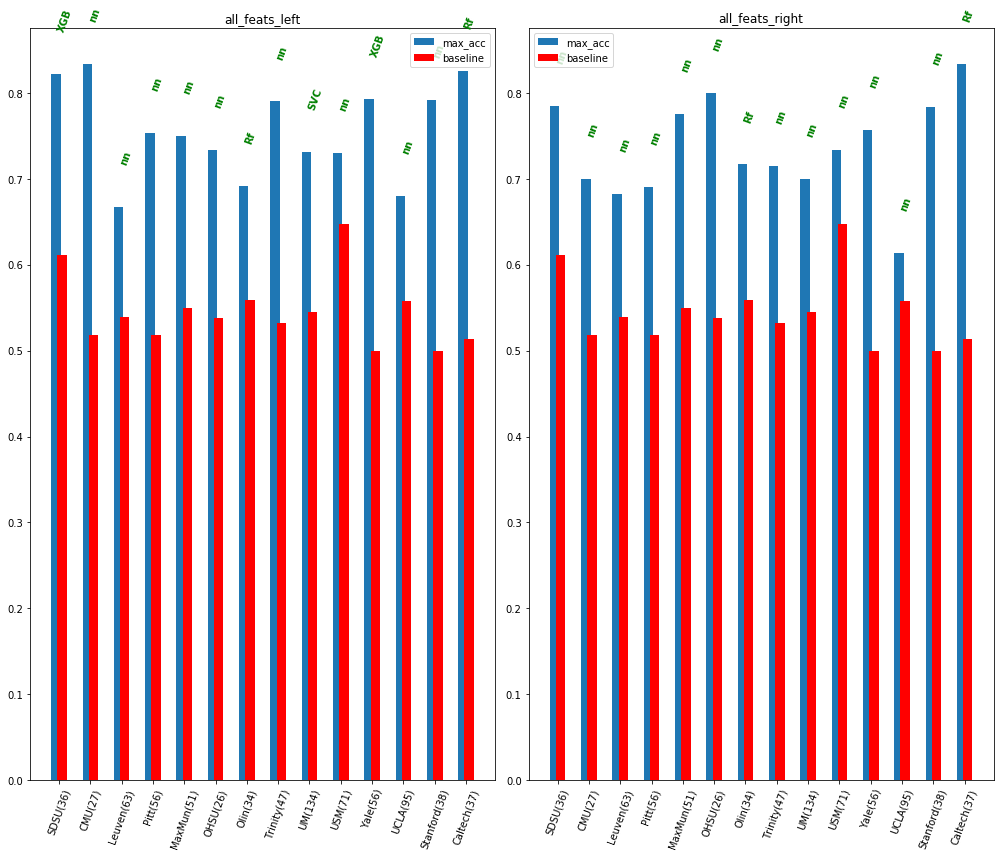

In [154]:
fig, axes = plt.subplots(1,2, figsize=(14,12))
x = np.arange(len(best_acc_list))-0.1

sites_names, clc_names, best_acc_list, baseline_list = model_all_dict[model_names[0]]
axes[0].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[0].set_xticks(range(len(new_sites_names)))
axes[0].set_xticklabels(labels=new_sites_names, rotation=70)
for ind, clc in enumerate(clc_names):
    axes[0].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[0].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[0].set_title(model_names[0])
axes[0].legend()

sites_names, clc_names, best_acc_list, baseline_list = model_all_dict[model_names[1]]
axes[1].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[1].set_xticks(range(len(new_sites_names)))
axes[1].set_xticklabels(labels=new_sites_names, rotation=70)
for ind, clc in enumerate(clc_names):
    axes[1].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[1].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[1].set_title(model_names[1])
axes[1].legend()


fig.tight_layout()

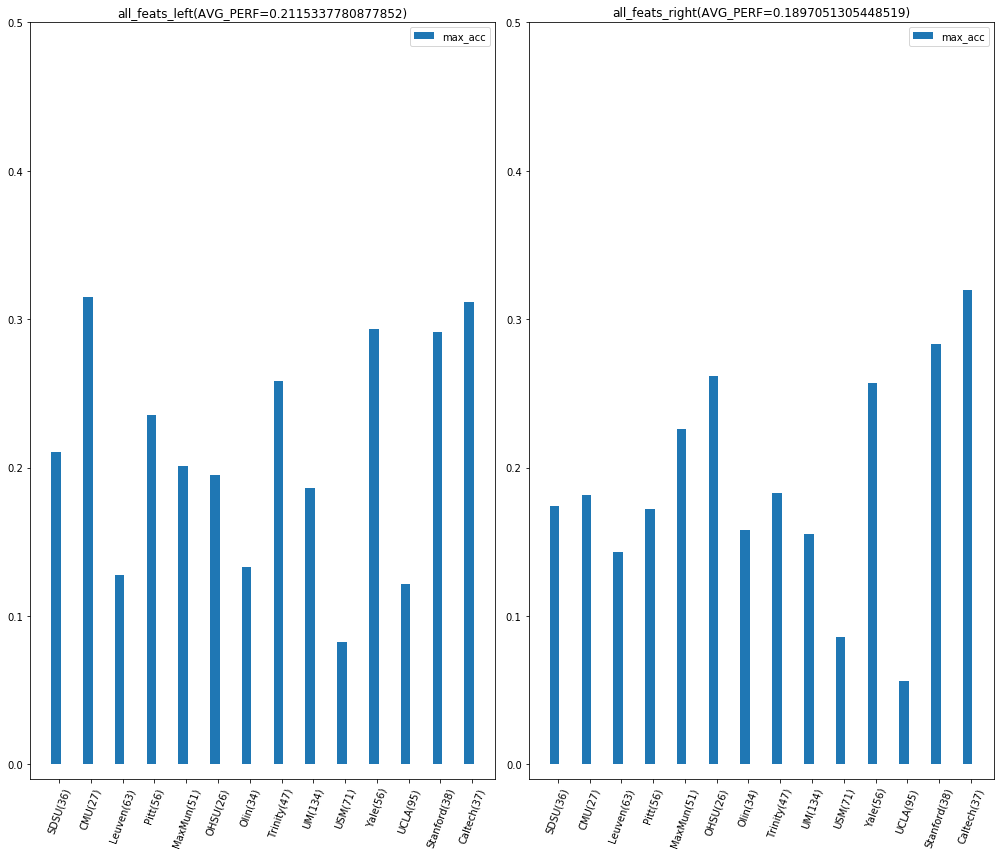

In [155]:
fig, axes = plt.subplots(1,2, figsize=(14,12))
sites_names, diff_list = get_relative_performance(model_all_dict, model_names[0])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[0].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[0].set_xticks(range(len(new_sites_names)))
axes[0].set_xticklabels(labels=new_sites_names, rotation=70)
axes[0].set_ylim((-0.01,0.5))
axes[0].set_title(model_names[0]+f"(AVG_PERF={np.mean(diff_list)})")
axes[0].legend()

sites_names, diff_list = get_relative_performance(model_all_dict, model_names[1])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[1].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[1].set_xticks(range(len(new_sites_names)))
axes[1].set_xticklabels(labels=new_sites_names, rotation=70)
axes[1].set_ylim((-0.01,0.5))

axes[1].set_title(model_names[1]+f"(AVG_PERF={np.mean(diff_list)})")
axes[1].legend()



fig.tight_layout()

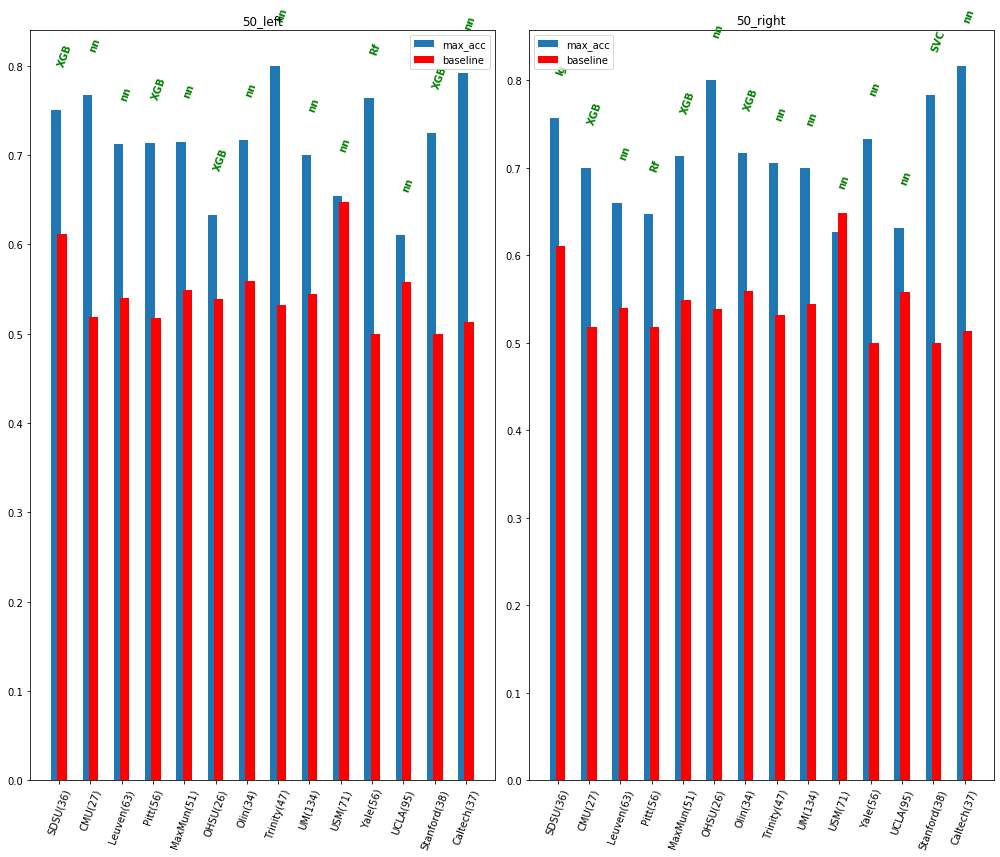

In [99]:
fig, axes = plt.subplots(1,2, figsize=(14,12))
x = np.arange(len(best_acc_list))-0.1

sites_names, clc_names, best_acc_list, baseline_list = model_corr_dict[model_names[0]]
axes[0].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[0].set_xticks(range(len(new_sites_names)))
axes[0].set_xticklabels(labels=new_sites_names, rotation=70)
for ind, clc in enumerate(clc_names):
    axes[0].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[0].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[0].set_title(model_names[0])
axes[0].legend()

sites_names, clc_names, best_acc_list, baseline_list = model_corr_dict[model_names[1]]
axes[1].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[1].set_xticks(range(len(new_sites_names)))
axes[1].set_xticklabels(labels=new_sites_names, rotation=70)
for ind, clc in enumerate(clc_names):
    axes[1].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[1].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[1].set_title(model_names[1])
axes[1].legend()


fig.tight_layout()

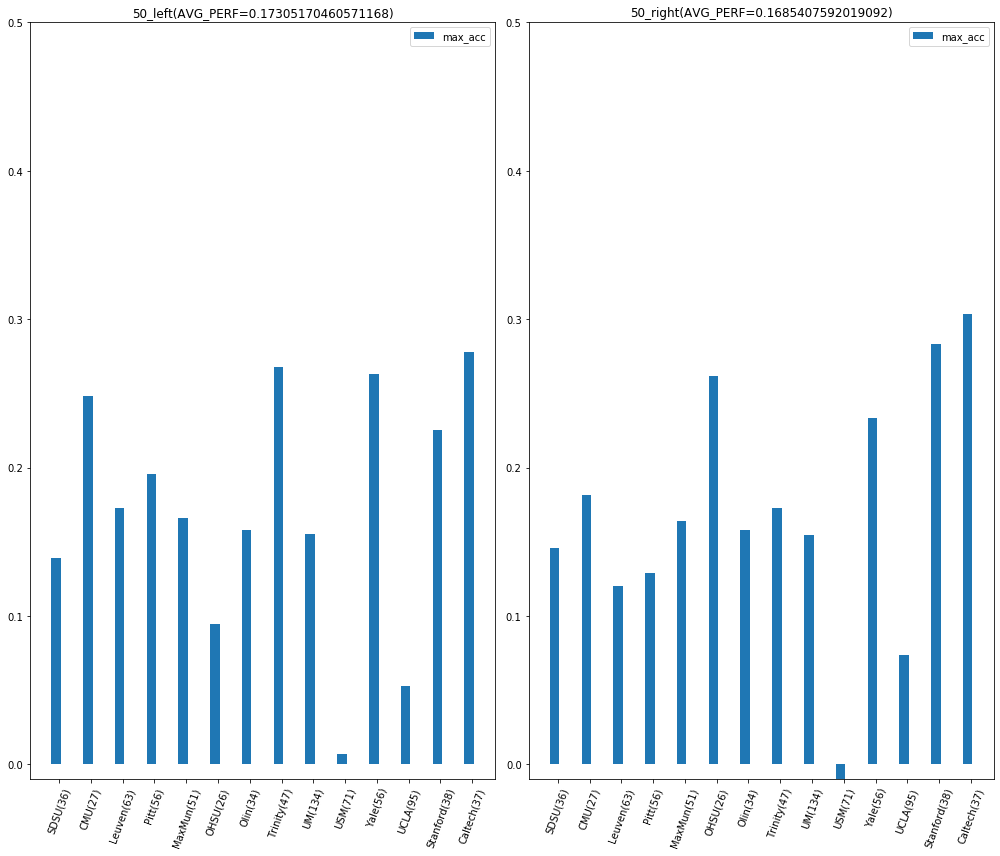

In [113]:
fig, axes = plt.subplots(1,2, figsize=(14,12))
sites_names, diff_list = get_relative_performance(model_corr_dict, model_names[0])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[0].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[0].set_xticks(range(len(new_sites_names)))
axes[0].set_xticklabels(labels=new_sites_names, rotation=70)
axes[0].set_ylim((-0.01,0.5))
axes[0].set_title(model_names[0]+f"(AVG_PERF={np.mean(diff_list)})")
axes[0].legend()

sites_names, diff_list = get_relative_performance(model_corr_dict, model_names[1])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[1].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[1].set_xticks(range(len(new_sites_names)))
axes[1].set_xticklabels(labels=new_sites_names, rotation=70)
axes[1].set_ylim((-0.01,0.5))

axes[1].set_title(model_names[1]+f"(AVG_PERF={np.mean(diff_list)})")
axes[1].legend()



fig.tight_layout()

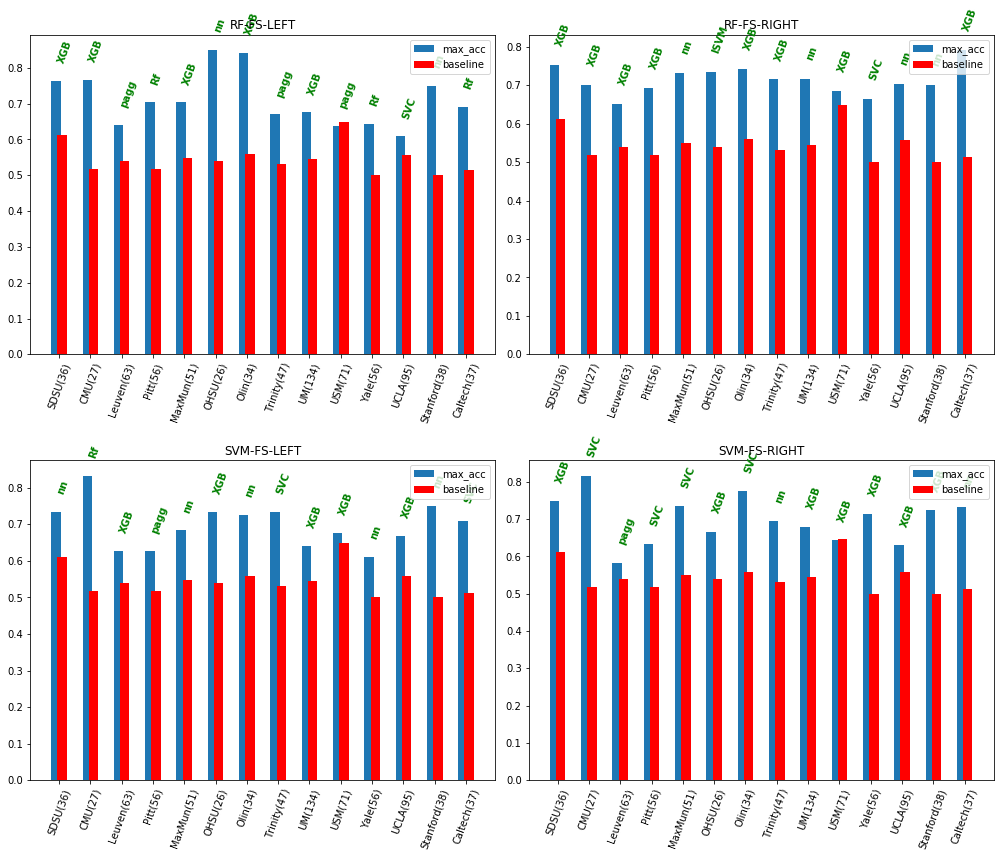

In [86]:
fig, axes = plt.subplots(2,2, figsize=(14,12))
x = np.arange(len(best_acc_list))-0.1

sites_names, clc_names, best_acc_list, baseline_list = model_dict[model_names[0]]
axes[0][0].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[0][0].set_xticks(range(len(new_sites_names)))
axes[0][0].set_xticklabels(labels=new_sites_names, rotation=70)
for ind, clc in enumerate(clc_names):
    axes[0][0].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[0][0].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[0][0].set_title(model_names[0])
axes[0][0].legend()

sites_names, clc_names, best_acc_list, baseline_list = model_dict[model_names[1]]
axes[0][1].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[0][1].set_xticks(range(len(new_sites_names)))
axes[0][1].set_xticklabels(labels=new_sites_names, rotation=70)
for ind, clc in enumerate(clc_names):
    axes[0][1].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[0][1].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[0][1].set_title(model_names[1])
axes[0][1].legend()

sites_names, clc_names, best_acc_list, baseline_list = model_dict[model_names[2]]
axes[1][0].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[1][0].set_xticks(range(len(new_sites_names)))
axes[1][0].set_xticklabels(labels=new_sites_names, rotation=70)
for ind, clc in enumerate(clc_names):
    axes[1][0].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[1][0].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[1][0].set_title(model_names[2])
axes[1][0].legend()

sites_names, clc_names, best_acc_list, baseline_list = model_dict[model_names[3]]
axes[1][1].bar(np.arange(len(best_acc_list))-0.1, best_acc_list, label='max_acc', width=0.3)
axes[1][1].set_xticks(range(len(new_sites_names)))
for ind, clc in enumerate(clc_names):
    axes[1][1].text(x[ind], best_acc_list[ind]+0.05, clc, color='green',fontweight='bold', rotation=70)
axes[1][1].set_xticklabels(labels=new_sites_names, rotation=70)
axes[1][1].bar(np.arange(len(best_acc_list))+0.1, baseline_list,color='r',width=0.3, label='baseline')
axes[1][1].set_title(model_names[3])
axes[1][1].legend()

fig.tight_layout()

In [103]:
def get_relative_performance(model_dict, model_name):
    sites_names, clc_names, best_acc_list, baseline_list = model_dict[model_name]
    diff_list = np.array(best_acc_list)-np.array(baseline_list)
    return sites_names, diff_list

In [110]:
sites_names, diff_list = get_relative_performance(model_dict, model_names[0])
print(model_names[0])


RF-FS-LEFT


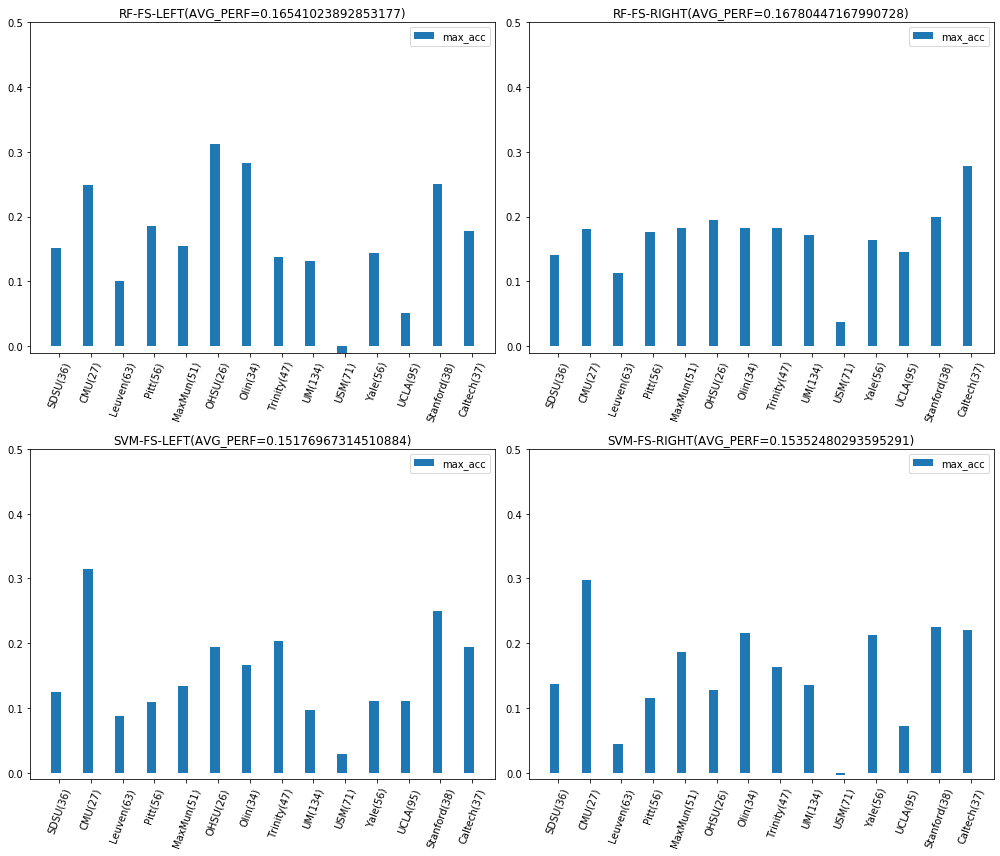

In [109]:
fig, axes = plt.subplots(2,2, figsize=(14,12))
sites_names, diff_list = get_relative_performance(model_dict, model_names[0])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[0][0].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[0][0].set_xticks(range(len(new_sites_names)))
axes[0][0].set_xticklabels(labels=new_sites_names, rotation=70)
axes[0][0].set_ylim((-0.01,0.5))
axes[0][0].set_title(model_names[0]+f"(AVG_PERF={np.mean(diff_list)})")
axes[0][0].legend()

sites_names, diff_list = get_relative_performance(model_dict, model_names[1])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[0][1].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[0][1].set_xticks(range(len(new_sites_names)))
axes[0][1].set_xticklabels(labels=new_sites_names, rotation=70)
axes[0][1].set_ylim((-0.01,0.5))

axes[0][1].set_title(model_names[1]+f"(AVG_PERF={np.mean(diff_list)})")
axes[0][1].legend()

sites_names, diff_list = get_relative_performance(model_dict, model_names[2])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[1][0].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[1][0].set_xticks(range(len(new_sites_names)))
axes[1][0].set_xticklabels(labels=new_sites_names, rotation=70)
axes[1][0].set_ylim((-0.01,0.5))

axes[1][0].set_title(model_names[2]+f"(AVG_PERF={np.mean(diff_list)})")
axes[1][0].legend()

sites_names, diff_list = get_relative_performance(model_dict, model_names[3])
new_sites_names = conc_sitename_size(sites_names, NUM_SAMPLES)
axes[1][1].bar(np.arange(len(best_acc_list))-0.1, diff_list, label='max_acc', width=0.3)
axes[1][1].set_xticks(range(len(new_sites_names)))
axes[1][1].set_xticklabels(labels=new_sites_names, rotation=70)
axes[1][1].set_ylim((-0.01,0.5))

axes[1][1].set_title(model_names[3]+f"(AVG_PERF={np.mean(diff_list)})")
axes[1][1].legend()

fig.tight_layout()

# Conclusion:
1. RF-FS-LEFT has the best average performance across all sites.
2. site USM with 71 subjects is dropping the performance
3. CMU site seems to have the most linear relationship between the morphological features and ASD

# Questions:
1. If I take out USM, will the overall performance increase?
2. If I pick any random features with the same size of each set of the selected features, will I have similar or different performance?
3. If I use both CORRANA and RFECV combined, will I have similar or different performance?


# Prepare good results data for Dr. Eid

In [137]:
Promising_sites = ['Caltech','CMU']
df_aparc_right_train = pd.read_csv('./Results/INITIAL_SPLIT/right_train_modifiedMedPIQR.csv', index_col=0)
df_aparc_right_test = pd.read_csv('./Results/INITIAL_SPLIT/right_test_modifiedMedPIQR.csv', index_col=0)
df_aparc_left_train = pd.read_csv('./Results/INITIAL_SPLIT/left_train_modifiedMedPIQR.csv', index_col=0)
df_aparc_left_test = pd.read_csv('./Results/INITIAL_SPLIT/left_test_modifiedMedPIQR.csv', index_col=0)

In [138]:
df_aparc_right = pd.concat([df_aparc_right_train, df_aparc_right_test], axis=0)
df_aparc_left = pd.concat([df_aparc_left_train, df_aparc_left_test], axis=0)
df_aparc = pd.concat([df_aparc_left, df_aparc_right], axis=1)
df_aparc.head()

C:\Users\bioen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\Users\bioen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,age,area_lbankssts_medMIQR,area_lbankssts_medPIQR,area_lcaudalanteriorcingulate_medMIQR,area_lcaudalanteriorcingulate_medPIQR,area_lcaudalmiddlefrontal_medMIQR,area_lcaudalmiddlefrontal_medPIQR,area_lcuneus_medMIQR,area_lcuneus_medPIQR,area_lentorhinal_medMIQR,...,vol_rsuperiorparietal_medMIQR,vol_rsuperiorparietal_medPIQR,vol_rsuperiortemporal_medMIQR,vol_rsuperiortemporal_medPIQR,vol_rsupramarginal_medMIQR,vol_rsupramarginal_medPIQR,vol_rtemporalpole_medMIQR,vol_rtemporalpole_medPIQR,vol_rtransversetemporal_medMIQR,vol_rtransversetemporal_medPIQR
SDSU_0050197,NaN,0.163445,1.196471,0.096233,1.347606,0.126497,1.261955,0.041787,1.276613,0.094346,...,-0.712552,3.741788,-0.678783,3.992088,-0.850788,4.322273,-1.512488,5.973953,0.081625,2.927005
CMU_b_0050657,NaN,0.221886,1.259661,0.072883,1.205236,0.114949,1.194420,0.058186,1.156168,0.200588,...,-0.408833,3.482473,-0.485903,4.537324,-0.560297,4.237300,-1.622933,7.864570,0.140143,3.240898
CMU_b_0050658,NaN,0.201345,1.176050,0.125207,1.187152,0.161095,1.203406,0.083877,1.129644,0.206600,...,-0.334182,3.240701,-0.139283,3.969496,-0.242665,3.662900,0.127398,6.169409,0.002778,2.850906
CMU_b_0050661,NaN,0.223667,1.198427,0.100287,1.199000,0.126055,1.224432,0.088972,1.115356,0.163220,...,-0.389488,3.011113,-0.278512,3.741123,-0.527510,3.867083,-1.300370,8.472240,0.137959,2.536413
CMU_b_0050667,NaN,0.159022,1.209473,0.071165,1.215978,0.143244,1.158907,0.061148,1.124297,0.236280,...,-0.251690,3.247833,-0.369462,4.078468,-0.374726,3.590696,-0.143113,7.584634,0.130124,2.677534


In [139]:
df_aparc.drop('age', axis=1, inplace=True)

In [140]:
df_aparc.drop('sex', axis=1, inplace=True)

In [141]:
labels = df_aparc['labels'].iloc[:,0]

In [142]:
labels

SDSU_0050197       0
CMU_b_0050657      0
CMU_b_0050658      0
CMU_b_0050661      0
CMU_b_0050667      0
                  ..
Trinity_0050248    1
NYU_0050983        1
USM_0050494        1
UM_1_0050291       1
UM_1_0050278       1
Name: labels, Length: 797, dtype: int64

In [143]:
df_aparc.drop('labels', axis=1, inplace=True)
df_aparc['labels'] = labels

In [144]:
df_aparc.shape

(797, 545)

In [145]:
df_aparc_right = pd.concat([df_aparc_right_train, df_aparc_right_test], axis=0)
df_aparc_left = pd.concat([df_aparc_left_train, df_aparc_left_test], axis=0)


C:\Users\bioen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\Users\bioen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [146]:
df_aparc_right

,age,area_rbankssts_medMIQR,area_rbankssts_medPIQR,area_rcaudalanteriorcingulate_medMIQR,area_rcaudalanteriorcingulate_medPIQR,area_rcaudalmiddlefrontal_medMIQR,area_rcaudalmiddlefrontal_medPIQR,area_rcuneus_medMIQR,area_rcuneus_medPIQR,area_rentorhinal_medMIQR,...,vol_rsuperiorparietal_medMIQR,vol_rsuperiorparietal_medPIQR,vol_rsuperiortemporal_medMIQR,vol_rsuperiortemporal_medPIQR,vol_rsupramarginal_medMIQR,vol_rsupramarginal_medPIQR,vol_rtemporalpole_medMIQR,vol_rtemporalpole_medPIQR,vol_rtransversetemporal_medMIQR,vol_rtransversetemporal_medPIQR
SDSU_0050197,NaN,0.163445,1.196471,0.096233,1.347606,0.126497,1.261955,0.041787,1.276613,0.094346,...,-0.712552,3.741788,-0.678783,3.992088,-0.850788,4.322273,-1.512488,5.973953,0.081625,2.927005
CMU_b_0050657,NaN,0.221886,1.259661,0.072883,1.205236,0.114949,1.194420,0.058186,1.156168,0.200588,...,-0.408833,3.482473,-0.485903,4.537324,-0.560297,4.237300,-1.622933,7.864570,0.140143,3.240898
CMU_b_0050658,NaN,0.201345,1.176050,0.125207,1.187152,0.161095,1.203406,0.083877,1.129644,0.206600,...,-0.334182,3.240701,-0.139283,3.969496,-0.242665,3.662900,0.127398,6.169409,0.002778,2.850906
CMU_b_0050661,NaN,0.223667,1.198427,0.100287,1.199000,0.126055,1.224432,0.088972,1.115356,0.163220,...,-0.389488,3.011113,-0.278512,3.741123,-0.527510,3.867083,-1.300370,8.472240,0.137959,2.536413
CMU_b_0050667,NaN,0.159022,1.209473,0.071165,1.215978,0.143244,1.158907,0.061148,1.124297,0.236280,...,-0.251690,3.247833,-0.369462,4.078468,-0.374726,3.590696,-0.143113,7.584634,0.130124,2.677534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trinity_0050248,13.5800,0.304810,1.198591,0.071756,1.175259,0.094436,1.211482,0.072580,1.243473,0.131179,...,-0.439106,3.763421,-0.176279,4.575863,-0.546784,4.792885,-0.809504,8.457985,0.208455,3.721975
NYU_0050983,10.4800,0.212988,1.199078,0.120984,1.262986,0.095008,1.308941,0.059140,1.315112,0.240817,...,-0.447580,3.454462,-0.365086,4.352954,-0.488845,4.181368,-1.106534,4.555664,0.216762,3.968536
USM_0050494,37.7769,0.157094,1.198377,0.051309,1.200364,0.097441,1.217711,0.077464,1.218553,0.167342,...,-0.194689,2.990321,-0.448081,4.038540,-0.222100,3.428119,-0.561451,6.044731,-0.070359,2.960213
UM_1_0050291,13.9000,0.180311,1.233577,0.124182,1.193718,0.156086,1.250445,0.063165,1.269769,0.038099,...,-0.393369,3.047514,-0.287262,3.468183,-0.506771,4.123055,-1.657001,6.282088,0.173064,2.422443


In [173]:
df_aparc_left

,area_lbankssts_medMIQR,area_lbankssts_medPIQR,area_lcaudalanteriorcingulate_medMIQR,area_lcaudalanteriorcingulate_medPIQR,area_lcaudalmiddlefrontal_medMIQR,area_lcaudalmiddlefrontal_medPIQR,area_lcuneus_medMIQR,area_lcuneus_medPIQR,area_lentorhinal_medMIQR,area_lentorhinal_medPIQR,...,vol_lsuperiorparietal_medMIQR,vol_lsuperiorparietal_medPIQR,vol_lsuperiortemporal_medMIQR,vol_lsuperiortemporal_medPIQR,vol_lsupramarginal_medMIQR,vol_lsupramarginal_medPIQR,vol_ltemporalpole_medMIQR,vol_ltemporalpole_medPIQR,vol_ltransversetemporal_medMIQR,vol_ltransversetemporal_medPIQR
SDSU_0050197,0.163445,1.196471,0.096233,1.347606,0.126497,1.261955,0.041787,1.276613,0.094346,1.312297,...,-0.712552,3.741788,-0.678783,3.992088,-0.850788,4.322273,-1.512488,5.973953,0.081625,2.927005
CMU_b_0050657,0.221886,1.259661,0.072883,1.205236,0.114949,1.194420,0.058186,1.156168,0.200588,1.173668,...,-0.408833,3.482473,-0.485903,4.537324,-0.560297,4.237300,-1.622933,7.864570,0.140143,3.240898
CMU_b_0050658,0.201345,1.176050,0.125207,1.187152,0.161095,1.203406,0.083877,1.129644,0.206600,1.194187,...,-0.334182,3.240701,-0.139283,3.969496,-0.242665,3.662900,0.127398,6.169409,0.002778,2.850906
CMU_b_0050661,0.223667,1.198427,0.100287,1.199000,0.126055,1.224432,0.088972,1.115356,0.163220,1.177905,...,-0.389488,3.011113,-0.278512,3.741123,-0.527510,3.867083,-1.300370,8.472240,0.137959,2.536413
CMU_b_0050667,0.159022,1.209473,0.071165,1.215978,0.143244,1.158907,0.061148,1.124297,0.236280,1.232692,...,-0.251690,3.247833,-0.369462,4.078468,-0.374726,3.590696,-0.143113,7.584634,0.130124,2.677534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trinity_0050248,0.304810,1.198591,0.071756,1.175259,0.094436,1.211482,0.072580,1.243473,0.131179,1.159087,...,-0.439106,3.763421,-0.176279,4.575863,-0.546784,4.792885,-0.809504,8.457985,0.208455,3.721975
NYU_0050983,0.212988,1.199078,0.120984,1.262986,0.095008,1.308941,0.059140,1.315112,0.240817,1.344757,...,-0.447580,3.454462,-0.365086,4.352954,-0.488845,4.181368,-1.106534,4.555664,0.216762,3.968536
USM_0050494,0.157094,1.198377,0.051309,1.200364,0.097441,1.217711,0.077464,1.218553,0.167342,1.159672,...,-0.194689,2.990321,-0.448081,4.038540,-0.222100,3.428119,-0.561451,6.044731,-0.070359,2.960213
UM_1_0050291,0.180311,1.233577,0.124182,1.193718,0.156086,1.250445,0.063165,1.269769,0.038099,1.359950,...,-0.393369,3.047514,-0.287262,3.468183,-0.506771,4.123055,-1.657001,6.282088,0.173064,2.422443


In [148]:
diff = df_aparc_left-df_aparc_right

In [149]:
diff.sum().sum()

0.0

In [150]:
df_aparc_left.drop(['age','sex'], axis=1, inplace=True)

In [151]:
df_aparc_left

,area_lbankssts_medMIQR,area_lbankssts_medPIQR,area_lcaudalanteriorcingulate_medMIQR,area_lcaudalanteriorcingulate_medPIQR,area_lcaudalmiddlefrontal_medMIQR,area_lcaudalmiddlefrontal_medPIQR,area_lcuneus_medMIQR,area_lcuneus_medPIQR,area_lentorhinal_medMIQR,area_lentorhinal_medPIQR,...,vol_lsuperiorparietal_medMIQR,vol_lsuperiorparietal_medPIQR,vol_lsuperiortemporal_medMIQR,vol_lsuperiortemporal_medPIQR,vol_lsupramarginal_medMIQR,vol_lsupramarginal_medPIQR,vol_ltemporalpole_medMIQR,vol_ltemporalpole_medPIQR,vol_ltransversetemporal_medMIQR,vol_ltransversetemporal_medPIQR
SDSU_0050197,0.163445,1.196471,0.096233,1.347606,0.126497,1.261955,0.041787,1.276613,0.094346,1.312297,...,-0.712552,3.741788,-0.678783,3.992088,-0.850788,4.322273,-1.512488,5.973953,0.081625,2.927005
CMU_b_0050657,0.221886,1.259661,0.072883,1.205236,0.114949,1.194420,0.058186,1.156168,0.200588,1.173668,...,-0.408833,3.482473,-0.485903,4.537324,-0.560297,4.237300,-1.622933,7.864570,0.140143,3.240898
CMU_b_0050658,0.201345,1.176050,0.125207,1.187152,0.161095,1.203406,0.083877,1.129644,0.206600,1.194187,...,-0.334182,3.240701,-0.139283,3.969496,-0.242665,3.662900,0.127398,6.169409,0.002778,2.850906
CMU_b_0050661,0.223667,1.198427,0.100287,1.199000,0.126055,1.224432,0.088972,1.115356,0.163220,1.177905,...,-0.389488,3.011113,-0.278512,3.741123,-0.527510,3.867083,-1.300370,8.472240,0.137959,2.536413
CMU_b_0050667,0.159022,1.209473,0.071165,1.215978,0.143244,1.158907,0.061148,1.124297,0.236280,1.232692,...,-0.251690,3.247833,-0.369462,4.078468,-0.374726,3.590696,-0.143113,7.584634,0.130124,2.677534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trinity_0050248,0.304810,1.198591,0.071756,1.175259,0.094436,1.211482,0.072580,1.243473,0.131179,1.159087,...,-0.439106,3.763421,-0.176279,4.575863,-0.546784,4.792885,-0.809504,8.457985,0.208455,3.721975
NYU_0050983,0.212988,1.199078,0.120984,1.262986,0.095008,1.308941,0.059140,1.315112,0.240817,1.344757,...,-0.447580,3.454462,-0.365086,4.352954,-0.488845,4.181368,-1.106534,4.555664,0.216762,3.968536
USM_0050494,0.157094,1.198377,0.051309,1.200364,0.097441,1.217711,0.077464,1.218553,0.167342,1.159672,...,-0.194689,2.990321,-0.448081,4.038540,-0.222100,3.428119,-0.561451,6.044731,-0.070359,2.960213
UM_1_0050291,0.180311,1.233577,0.124182,1.193718,0.156086,1.250445,0.063165,1.269769,0.038099,1.359950,...,-0.393369,3.047514,-0.287262,3.468183,-0.506771,4.123055,-1.657001,6.282088,0.173064,2.422443


In [32]:
file_dir = './Results/sites_results.joblib'
file_s_dir = './Results/sites_results_leftover.joblib'
file_corr_dir = "./Results/sites_results_correlation.joblib"
file_all_dir = './Results/sites_results_all.joblib'
file = load(file_dir)
file_rest = load(file_s_dir)
file_corr = load(file_corr_dir)
file_all = load(file_all_dir)

In [75]:
file_all['CMU']['all_feats_left']['nn'].best_estimator_

MLPClassifier(beta_1=0.1, beta_2=0.001, hidden_layer_sizes=(150, 100, 50),
              learning_rate='adaptive', max_iter=1000000)

In [37]:
SITES = list(BASELINES.keys())

In [152]:
def extract_site_subj(df, site_names):
    site_subj = []
    for site in site_names:
        for index in df.index:
            if site in index:
                site_subj.append(index)
    return site_subj

In [225]:
sites_subj = extract_site_subj(df_aparc_left, ['Caltech'])

In [226]:
len(sites_subj)

31

In [227]:
df_promising = df_aparc_left.loc[sites_subj,:]

In [245]:
(df_promising['labels']==1).sum()

13

In [229]:
df_promising.shape

(31, 273)

In [247]:
18/31

0.5806451612903226

In [231]:
X = df_promising.drop('labels', axis=1)
y = df_promising['labels']

In [232]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

In [233]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [234]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
ytrain = ytrain.values
ytest = ytest.values

In [235]:
Xtrain.shape

(24, 272)

In [236]:
Xtest.shape

(7, 272)

In [243]:
repeated_fold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1421)
acc_list = []
max_acc = 0
best_obj = None
for train_index, test_index in repeated_fold.split(Xtrain, ytrain):
    X_train, X_test = Xtrain[train_index,:], Xtrain[test_index,:]
    y_train, y_test = ytrain[train_index], ytrain[test_index]
    nn = MLPClassifier(beta_1=0.1, beta_2=0.001, hidden_layer_sizes=(150, 100, 50),
              learning_rate='adaptive', max_iter=1000000)
    nn.fit(X_train, y_train)
    y_hat = nn.predict(X_test)
    acc = balanced_accuracy_score(y_test, y_hat)
    if acc > max_acc:
        max_acc = acc
        best_obj = nn
    acc_list.append(acc)

In [244]:
np.mean(acc_list)

0.7766666666666666

(0.9,
 MLPClassifier(beta_1=0.1, beta_2=0.001, hidden_layer_sizes=(150, 100, 50),
               learning_rate='adaptive', max_iter=1000000))

In [158]:
yh = best_obj.predict(Xtest)

In [159]:
balanced_accuracy_score(ytest, yh)

0.5795454545454546

In [249]:
df_promising.to_csv('CALTECH_LEFT.csv')